In [1]:
# Install the required libraries
!pip install prophet

Libraries successfully installed


In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [3]:
# Upload the bitcoin_hourly.csv file
from google.colab import files
uploaded = files.upload()

Saving bitcoin_hourly.csv to bitcoin_hourly.csv


In [13]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("sp500.csv",
                 index_col="time",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Remove the timezone from the index for Prophet
df.index = df.index.tz_localize(None)

# Preview the dataset
df.head()

,close
time,
2019-01-02 12:45:00,246.16
2019-01-02 13:00:00,246.15
2019-01-02 13:15:00,245.50
2019-01-02 13:30:00,245.71
2019-01-02 13:45:00,245.76


<Axes: xlabel='time'>

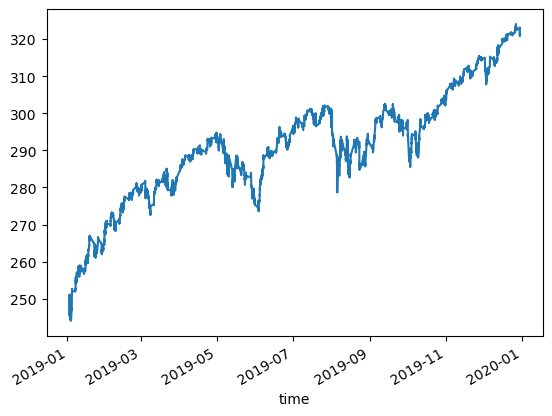

In [14]:
# Visually inspect the price data
df["close"].plot()

In [15]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()

In [16]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns = ["ds", "y"]

In [17]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(df.shape)
display(df.head())
display(df.tail())

(9328, 2)

,ds,y
0,2019-01-02 12:45:00,246.16
1,2019-01-02 13:00:00,246.15
2,2019-01-02 13:15:00,245.50
3,2019-01-02 13:30:00,245.71
4,2019-01-02 13:45:00,245.76


,ds,y
9323,2019-12-30 20:30:00,321.10
9324,2019-12-30 20:45:00,321.12
9325,2019-12-30 21:00:00,321.23
9326,2019-12-30 21:30:00,321.23
9327,2019-12-30 21:45:00,321.20


In [18]:
# Sort the DataFrame by `ds` in ascending order
df = df.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(df.head(10))
display(df.tail(10))

,ds,y
0,2019-01-02 12:45:00,246.16
1,2019-01-02 13:00:00,246.15
2,2019-01-02 13:15:00,245.50
3,2019-01-02 13:30:00,245.71
4,2019-01-02 13:45:00,245.76
5,2019-01-02 14:00:00,246.17
6,2019-01-02 14:15:00,246.09
7,2019-01-02 14:30:00,246.90
8,2019-01-02 14:45:00,247.18
9,2019-01-02 15:00:00,248.38


,ds,y
9318,2019-12-30 19:15:00,321.270
9319,2019-12-30 19:30:00,321.240
9320,2019-12-30 19:45:00,321.150
9321,2019-12-30 20:00:00,321.250
9322,2019-12-30 20:15:00,321.365
9323,2019-12-30 20:30:00,321.100
9324,2019-12-30 20:45:00,321.120
9325,2019-12-30 21:00:00,321.230
9326,2019-12-30 21:30:00,321.230
9327,2019-12-30 21:45:00,321.200


<Axes: >

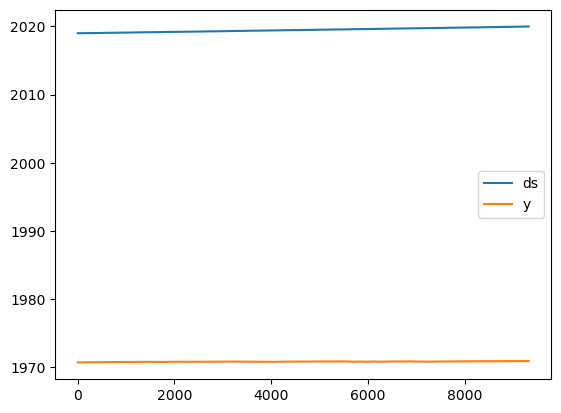

In [19]:
# Plot the data
df.plot()

In [20]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [21]:
# Fit the Prophet model.
model.fit(df)

13:53:04 - cmdstanpy - INFO - Chain [1] start processing
13:53:08 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model.make_future_dataframe(periods=1000, freq="H")

# View the last five rows of the predictions
future_trends.tail()

,ds
10323,2020-02-10 09:45:00
10324,2020-02-10 10:45:00
10325,2020-02-10 11:45:00
10326,2020-02-10 12:45:00
10327,2020-02-10 13:45:00


In [23]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02 12:45:00,248.891366,244.479500,249.883358,248.891366,248.891366,-1.717583,-1.717583,-1.717583,-1.235864,-1.235864,-1.235864,-0.481719,-0.481719,-0.481719,0.0,0.0,0.0,247.173783
1,2019-01-02 13:00:00,248.904258,244.379075,249.819307,248.904258,248.904258,-1.700320,-1.700320,-1.700320,-1.216577,-1.216577,-1.216577,-0.483743,-0.483743,-0.483743,0.0,0.0,0.0,247.203939
2,2019-01-02 13:15:00,248.917150,244.482615,249.800870,248.917150,248.917150,-1.686524,-1.686524,-1.686524,-1.200788,-1.200788,-1.200788,-0.485736,-0.485736,-0.485736,0.0,0.0,0.0,247.230626
3,2019-01-02 13:30:00,248.930042,244.641738,250.146694,248.930042,248.930042,-1.676574,-1.676574,-1.676574,-1.188876,-1.188876,-1.188876,-0.487699,-0.487699,-0.487699,0.0,0.0,0.0,247.253468
4,2019-01-02 13:45:00,248.942934,244.662870,250.219844,248.942934,248.942934,-1.670342,-1.670342,-1.670342,-1.180713,-1.180713,-1.180713,-0.489629,-0.489629,-0.489629,0.0,0.0,0.0,247.272592


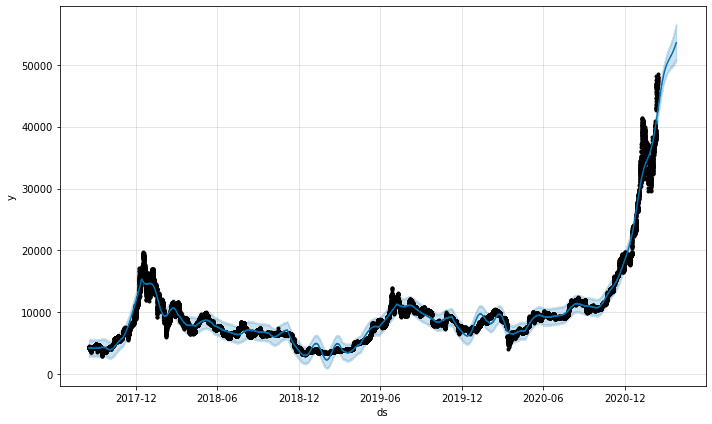

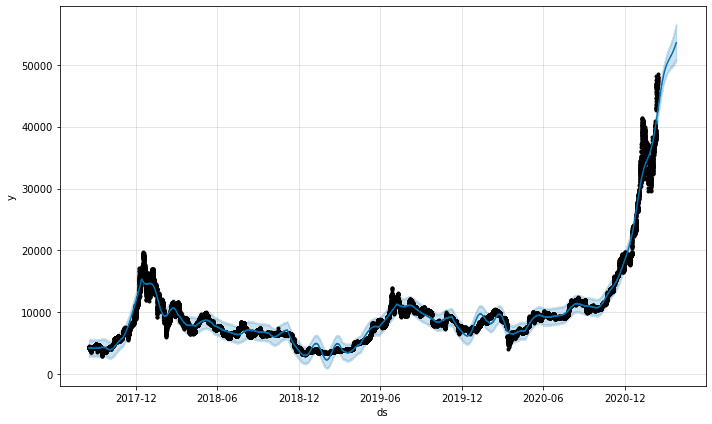

In [15]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_trends)

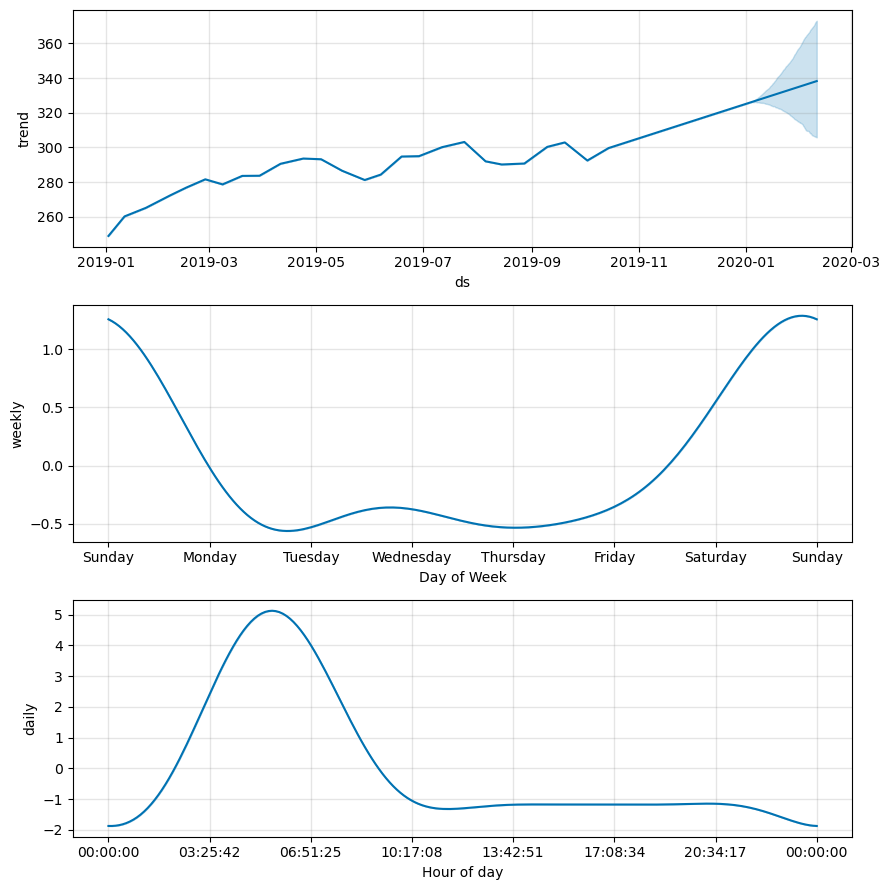

In [24]:
# Use the plot_components function to visualize the forecast results 
figures = model.plot_components(forecast_trends)

In [25]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(["ds"])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2019-01-02 12:45:00,248.891366,244.479500,249.883358,248.891366,248.891366,-1.717583,-1.717583,-1.717583,-1.235864,-1.235864,-1.235864,-0.481719,-0.481719,-0.481719,0.0,0.0,0.0,247.173783
2019-01-02 13:00:00,248.904258,244.379075,249.819307,248.904258,248.904258,-1.700320,-1.700320,-1.700320,-1.216577,-1.216577,-1.216577,-0.483743,-0.483743,-0.483743,0.0,0.0,0.0,247.203939
2019-01-02 13:15:00,248.917150,244.482615,249.800870,248.917150,248.917150,-1.686524,-1.686524,-1.686524,-1.200788,-1.200788,-1.200788,-0.485736,-0.485736,-0.485736,0.0,0.0,0.0,247.230626
2019-01-02 13:30:00,248.930042,244.641738,250.146694,248.930042,248.930042,-1.676574,-1.676574,-1.676574,-1.188876,-1.188876,-1.188876,-0.487699,-0.487699,-0.487699,0.0,0.0,0.0,247.253468
2019-01-02 13:45:00,248.942934,244.662870,250.219844,248.942934,248.942934,-1.670342,-1.670342,-1.670342,-1.180713,-1.180713,-1.180713,-0.489629,-0.489629,-0.489629,0.0,0.0,0.0,247.272592


<Axes: xlabel='ds'>

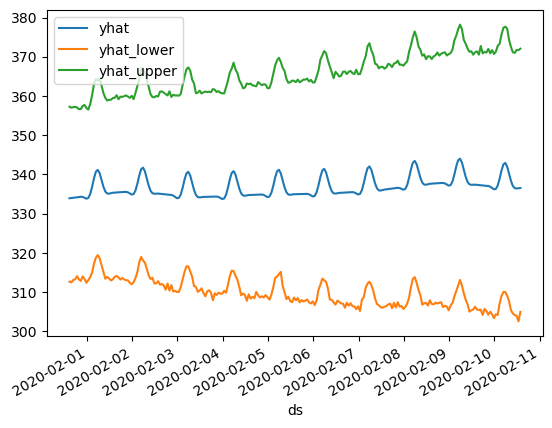

In [26]:
# From the `forecast_trends` DataFrame, plot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-240:, :].plot()

In [31]:
# Create a `forecast_feb_2020` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_feb_2020 = forecast_trends.loc["2020-02-01":"2021-02-28"][["yhat_upper", "yhat_lower", "yhat"]]

# Replace the column names to something less technical sounding
forecast_feb_2020 = forecast_feb_2020.rename(
    columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case", 
        "yhat": "Most Likely Case"
    }
)

# Review the last five rows of the DataFrame
forecast_feb_2020.tail()

,Best Case,Worst Case,Most Likely Case
ds,,,
2020-02-10 09:45:00,371.132742,304.553919,337.096077
2020-02-10 10:45:00,371.003843,304.213220,336.521548
2020-02-10 11:45:00,371.721032,303.979320,336.431526
2020-02-10 12:45:00,371.708082,302.564617,336.506733
2020-02-10 13:45:00,372.053002,304.996391,336.560014


In [32]:
# Display the average forecasted price for March 2021
forecast_feb_2020.mean()

Best Case           366.208201
Worst Case          309.787786
Most Likely Case    336.935968
dtype: float64